# 4 Linear Equations

Simultaneous Linear Equations

We have an equation of the tipe $\mathbf{A} \vec{x} = \vec{v}$

###### Gaussian Elimination

Proceso: Convertir el primer elemento del primer renglon libre en un 1, usar ese 1 para convertir la parte de abajo de la columna en 0s. <br>
Ir haciendo esto hasta tener una matriz triangular. <br>
Con ello podemos definir la ultima variable y luego  ir subiendo para obtener las demas

In [1]:
import numpy as np

A = np.array([[2,1,4,1],[3,4,-1,-1],[1,-4,1,5],[2,-2,1,3]], float)
v = np.array([-4,3,0,7],float)
N = len(v)

# Gaussian elimination:

for m in range(N):
    #divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    #now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]
    
    
#Backsubstitution
x = np.empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i] * x[i]
        
print(x)






[ 7.29411765 -6.69117647 -1.33823529 -6.54411765]


###### LU decomposition

Suppose we have a matrix $ A = (a_{ij})$ <br>
Let us perform Gaussian elimination on this matrix to reduce it to upper triangular form

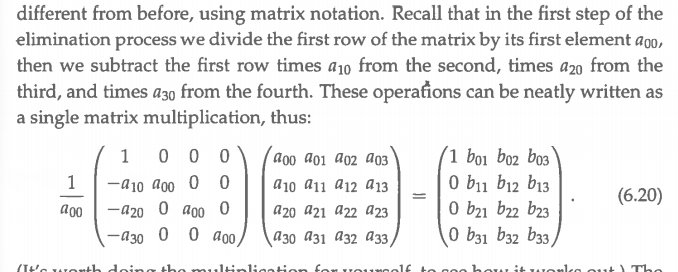

We call this matrix $L_0$, and is the matrix that does the first step in the Gaussian elimination. 

Similarly, for the second step, we multiply by a matrix $L_1$ and then a Matrix $L_2$ and $L_3$
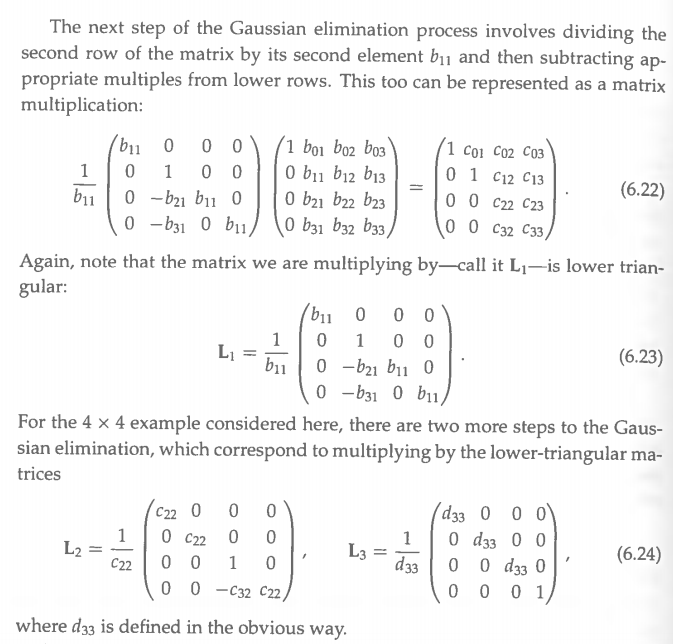

Therefore, if we multiply by the $L$s on both sides, we have: 

$L_3L_2L_1L_0 A x = L_3L_2L_1L_0 v$

Then, we define $L = L_0^{-1} L_1^{-1} L_2^{-1} L_3^{-1}$ and $U = L_3 L_2 L_1 L_0 A$. <br>
So that we have that $LU = A$ <br>
And therefore, the equation is $LU x = v$ <br>

The nice thing is that $U$ is upper triangular and $L$ is lower trangular. Actually, calculating the inverse matrices to $L_i$, we get:
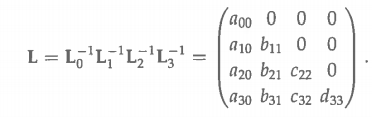

In [2]:
#Numpy has a linear equations resolver
# the solve function uses the LU method

x= np.linalg.solve(A,v)
print(x)

[ 7.29411765 -6.69117647 -1.33823529 -6.54411765]


Calculating the inverse of Matrix

In [3]:
X = np.linalg.inv(A)
print(X)

[[ 1.  -0.5 -3.4 -1. ]
 [ 0.   1.   2.8  1. ]
 [ 0.   0.   1.   0. ]
 [ 0.   0.   0.   1. ]]
